# Prime numbers

## Imports

In [11]:
import operator

import matplotlib.pyplot as plt

from prinum import find_prime_numbers
from prinum import last_digit
from prinum import bin_successions

## Find prime numbers between 0 and 10.000

In [30]:
prime_numbers = list(find_prime_numbers(0, 10_000))
print(f'We found {len(prime_numbers)} prime numbers between 0 and 50.000. These are the first 50:')
print(*prime_numbers[:50], sep=", ", end=" ...")

We found 1229 prime numbers between 0 and 50.000. These are the first 50:
2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97, 101, 103, 107, 109, 113, 127, 131, 137, 139, 149, 151, 157, 163, 167, 173, 179, 181, 191, 193, 197, 199, 211, 223, 227, 229 ...

## Get the last digit of each prime number

In [31]:
last_digits = [last_digit(number) for number in prime_numbers]
print('The last digits of the first 50 prime numbers:')
print(*last_digits[:50], sep=", ", end=" ...")

The last digits of the first 50 prime numbers:
2, 3, 5, 7, 1, 3, 7, 9, 3, 9, 1, 7, 1, 3, 7, 3, 9, 1, 7, 1, 3, 9, 3, 9, 7, 1, 3, 7, 9, 3, 7, 1, 7, 9, 9, 1, 7, 3, 7, 3, 9, 1, 1, 3, 7, 9, 1, 3, 7, 9 ...

## Count combinations of two adjacent last digits

In [37]:
bins = bin_successions(last_digits)
print(f'There are {len(bins.keys())} combinations. Example: The combination 3 and 7 appears {bins[(3, 7)]} times.')

There are 19 combinations. Example: The combination 3 and 7 appears 99 times.


## Prepare data for plotting

In [49]:
data = [(key[0], key[1], value) for key, value in bins.items() if not value == 1]
data.sort(key = operator.itemgetter(0, 1))
print(f'Combinations that only appear once are removed: {[(k[0], k[1]) for k, v in bins.items() if v == 1]}')

Combinations that only appear once are removed: [(2, 3), (3, 5), (5, 7)]


## Chose a color map

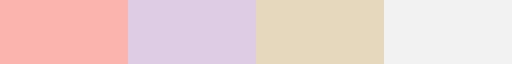

In [52]:
cmap = plt.get_cmap('Pastel1', 4)
cmap

## Plot distribution of last digit combinations
-- grouped by first digit --

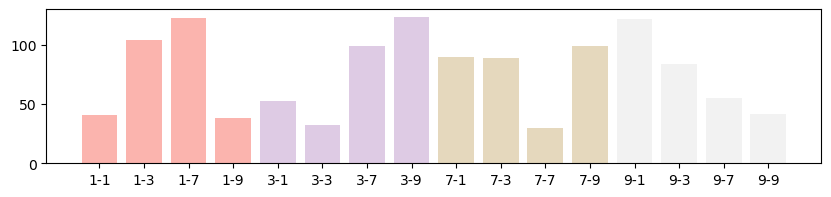

In [53]:
successions = [f'{val[0]}-{val[1]}' for val in data]
counts = [val[2] for val in data]

plt.figure(figsize=(10,2))

plt.bar(successions, counts, color=[
    cmap.colors[0], cmap.colors[0], cmap.colors[0], cmap.colors[0],
    cmap.colors[1], cmap.colors[1], cmap.colors[1], cmap.colors[1],
    cmap.colors[2], cmap.colors[2], cmap.colors[2], cmap.colors[2],
    cmap.colors[3], cmap.colors[3], cmap.colors[3], cmap.colors[3]
])
plt.show()

## Chose a second color map

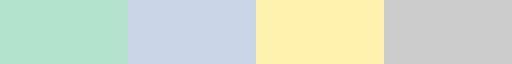

In [54]:
cmap = plt.get_cmap('Pastel2', 4)
cmap

## Plot distribution of last digit combinations
-- grouped by last digit --

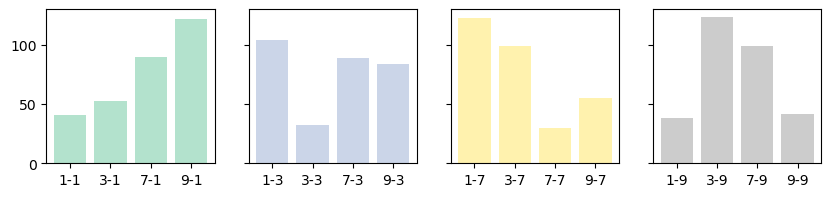

In [55]:
fig, ax = plt.subplots(1, 4, sharey='row', figsize=(10,2))

for index, last_digit in enumerate([1, 3, 7, 9]):
    successions = [f'{val[0]}-{val[1]}' for val in data if val[1] == last_digit]
    counts = [val[2] for val in data if val[1] == last_digit]
    ax[index].bar(successions, counts, color=cmap.colors[index])
plt.show()